In [142]:
#import dependancies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

color_pal = sns.color_palette()
plt.style.use('seaborn-white')


In [143]:
#read the dataset into a dataframe using Pandas

df = pd.read_csv('Manhattan12.csv', thousands=',')


In [144]:
#Get information about the data ie; Column names, non-null rows count and data types for all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27395 entries, 0 to 27394
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         27395 non-null  int64 
 1   NEIGHBORHOOD                    27395 non-null  object
 2   BUILDING CLASS CATEGORY         27395 non-null  object
 3   TAX CLASS AT PRESENT            27395 non-null  object
 4   BLOCK                           27395 non-null  int64 
 5   LOT                             27395 non-null  int64 
 6   EASE-MENT                       27395 non-null  object
 7   BUILDING CLASS AT PRESENT       27395 non-null  object
 8   ADDRESS                         27395 non-null  object
 9   APART
MENT
NUMBER               27395 non-null  object
 10  ZIP CODE                        27395 non-null  int64 
 11  RESIDENTIAL UNITS               27395 non-null  int64 
 12  COMMERCIAL UNITS                27395 non-null

In [145]:
#Number of rows and columns in the Dataframe
df.shape


(27395, 21)

In [146]:
#Reformatting column names for easier processing
df.columns = df.columns.str.replace('\n', ' ').str.replace(" ", "_").str.replace("-", "")


In [147]:
# A function that changes Data Types of columns to their right types according to the description.
# Most columns had been wrongly labeled so i corrrected them.


def type_convertion(df):

    integer_cols = ['LAND_SQUARE_FEET','GROSS_SQUARE_FEET','BOROUGH']
    for col in integer_cols: # coerce for missing values
        
        df[col] = pd.to_numeric(df[col], errors='coerce')

    category_cols = ['NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY', 'TAX_CLASS_AT_PRESENT', 'BUILDING_CLASS_AT_PRESENT', 'BUILDING_CLASS_AT_TIME_OF_SALE', 'TAX_CLASS_AT_TIME_OF_SALE']
    for col in category_cols:
        df[col] = df[col].astype('category')

    df['SALE_DATE'] = pd.to_datetime(df['SALE_DATE'], errors='coerce', dayfirst=True)
    df['SALE_PRICE'] = df['SALE_PRICE'].str.replace(',', '').str.replace('$', '', regex=True).astype('int')
    return df

In [148]:
# Preprocessing the Data according to data types of the columns
# by first seperating caltegorical and numerical columns into seperate dataframes,
# removing commas, '$' and replacing 0s with np.Nan to be treated as missing values in numeric columns
#removing spaces and replacing empty rows with np.Nan to be considered missing,
# then combining the processed dataframes into one Dataframe


def process_by_dtype(df):
    data_cat = df.select_dtypes(exclude=('int64', 'float64')) #Object Dtype is categorical
    data_num = df.select_dtypes(include=('int64', 'float64'))
    
    
    data_num = data_num.apply(lambda x: x.replace(',', '').replace('$', '')).astype('int').replace(0, np.NaN)
    data_cat = data_cat.replace(' ', '').replace('', np.NaN).replace(' ', np.NaN)

    data = pd.concat([data_cat, data_num], axis=1)
    return data

In [149]:
#applying the above function to the dataframe
data = process_by_dtype(type_convertion(df))

In [150]:
data.isnull().sum()

NEIGHBORHOOD                          0
BUILDING_CLASS_CATEGORY               0
TAX_CLASS_AT_PRESENT                  0
EASEMENT                          27395
BUILDING_CLASS_AT_PRESENT             0
ADDRESS                               0
APART_MENT_NUMBER                     0
TAX_CLASS_AT_TIME_OF_SALE             0
BUILDING_CLASS_AT_TIME_OF_SALE        0
SALE_DATE                             0
BOROUGH                               0
BLOCK                                 0
LOT                                   0
ZIP_CODE                              1
RESIDENTIAL_UNITS                 16372
COMMERCIAL_UNITS                  23962
TOTAL_UNITS                        9704
LAND_SQUARE_FEET                  22906
GROSS_SQUARE_FEET                 23069
YEAR_BUILT                         6441
SALE_PRICE                         7593
dtype: int64

In [151]:
# Math for Missing Value statistics by finding the percentage missingness for every column.
import math
for i in data.columns:
    print(f'{i} : : {math.floor((data[i].isnull().sum() / len(data)) * 100)}% missing')


NEIGHBORHOOD : : 0% missing
BUILDING_CLASS_CATEGORY : : 0% missing
TAX_CLASS_AT_PRESENT : : 0% missing
EASEMENT : : 100% missing
BUILDING_CLASS_AT_PRESENT : : 0% missing
ADDRESS : : 0% missing
APART_MENT_NUMBER : : 0% missing
TAX_CLASS_AT_TIME_OF_SALE : : 0% missing
BUILDING_CLASS_AT_TIME_OF_SALE : : 0% missing
SALE_DATE : : 0% missing
BOROUGH : : 0% missing
BLOCK : : 0% missing
LOT : : 0% missing
ZIP_CODE : : 0% missing
RESIDENTIAL_UNITS : : 59% missing
COMMERCIAL_UNITS : : 87% missing
TOTAL_UNITS : : 35% missing
LAND_SQUARE_FEET : : 83% missing
GROSS_SQUARE_FEET : : 84% missing
YEAR_BUILT : : 23% missing
SALE_PRICE : : 27% missing


<AxesSubplot:>

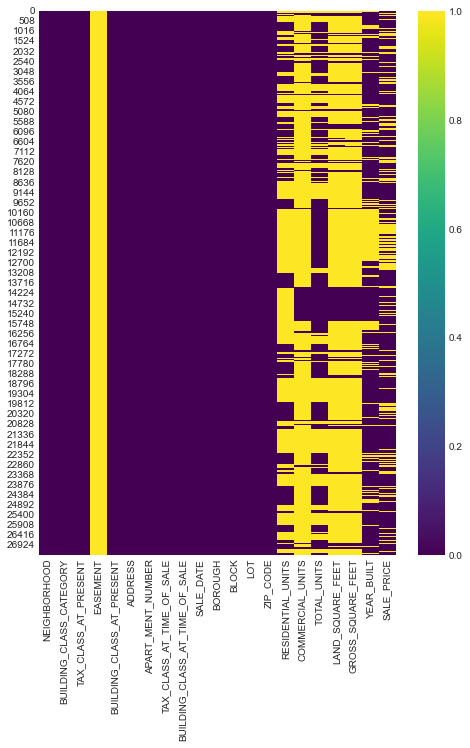

In [152]:
#Missing Values color plot. It shows the distribution of missing values through the dataframe.

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(8,10))
sns.heatmap(data.isnull(),cmap='viridis')

In [153]:
# More Joined Data Preprocessing

def processing(data):
    # dropping columns 'BOROUGH', 'EASEMENT' and 'APART_MENT_NUMBER'
    data.drop(['BOROUGH', 'EASEMENT', 'APART_MENT_NUMBER'], axis=1, inplace=True)
    #dropping any duplicates in the data
    data = data.drop_duplicates()
    # Dropping rows with missing data
    data.dropna(axis=0, inplace = True)
    
    #Log normalization of price Column
    data['SALE_PRICE'] = np.log(data['SALE_PRICE'])
    
    return data

In [154]:
#Applying the Above preprocessing function to the data
data = processing(data)

/tmp/ipykernel_100991/4115843496.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(axis=0, inplace = True)
/tmp/ipykernel_100991/4115843496.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SALE_PRICE'] = np.log(data['SALE_PRICE'])


<AxesSubplot:>

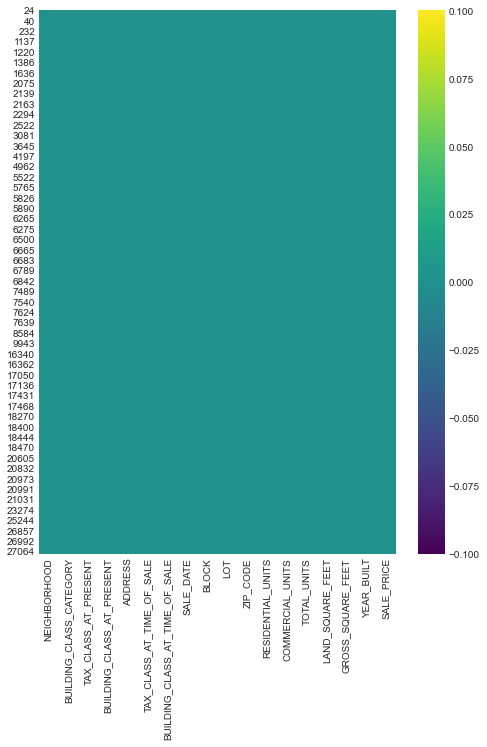

In [155]:
# Resulting color map showing that there are no more missing data

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(8,10))
sns.heatmap(data.isnull(),cmap='viridis')

## Data exploration through Visuals

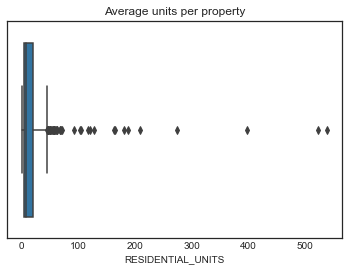

In [156]:
# The dataset seem to have lots of outliers, mainly due to commercial property sales
sns.boxplot(x='RESIDENTIAL_UNITS',data=data)
plt.title('Average units per property')
plt.show()

<AxesSubplot:xlabel='SALE_DATE'>

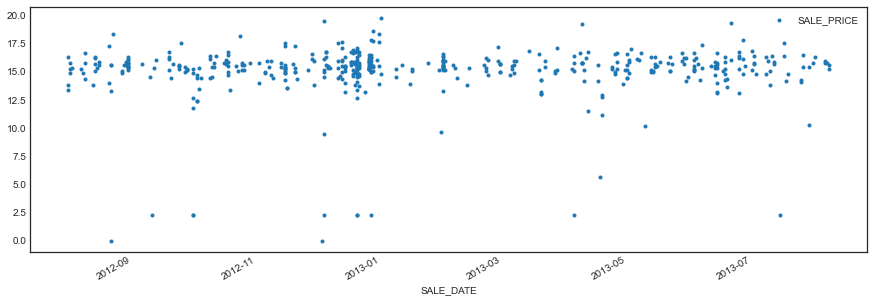

In [157]:
# Plot showing Prices of property and the date they were sold
data.plot(x='SALE_DATE', y='SALE_PRICE', style='.', figsize=(15, 5), color=color_pal[0])

<AxesSubplot:xlabel='YEAR_BUILT'>

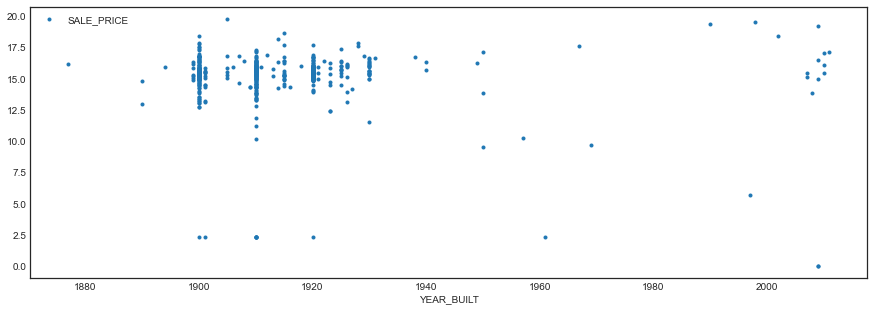

In [158]:
#Sales Price VS Year Built
data.plot(x= 'YEAR_BUILT', y='SALE_PRICE', style='.', figsize=(15, 5), color=color_pal[0])

<AxesSubplot:>

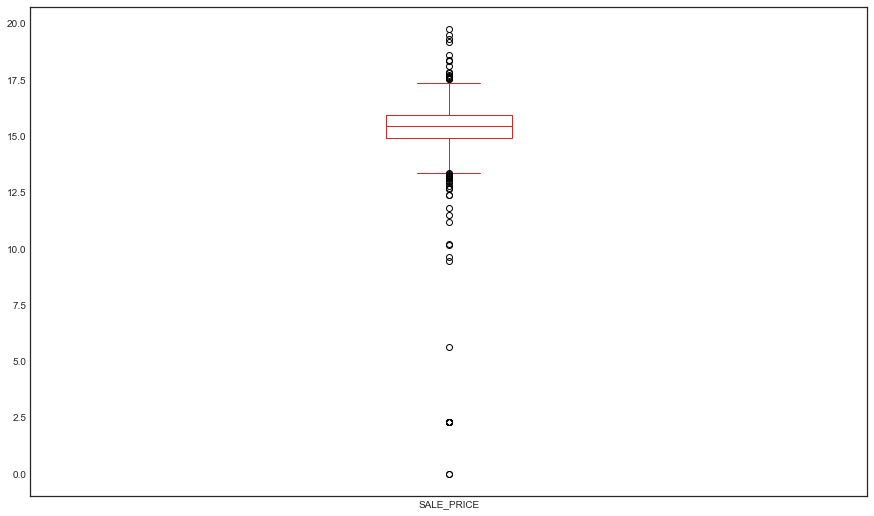

In [159]:
#Sale Price boxplot to show outliers
data['SALE_PRICE'].plot(kind='box', figsize=(15, 9), color=color_pal[3])

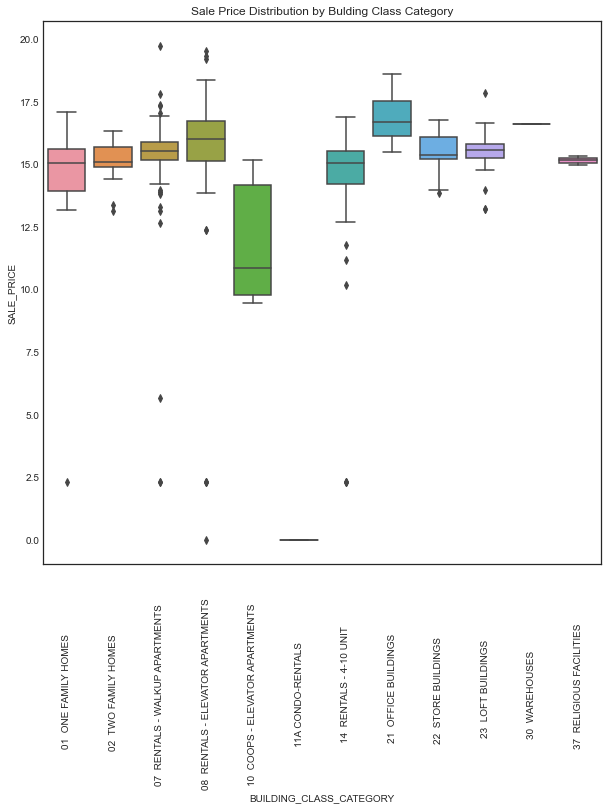

In [160]:
# distribution of different categories
plt.figure(figsize=(10,10))
order = sorted(data['BUILDING_CLASS_CATEGORY'].unique())
sns.boxplot(x='BUILDING_CLASS_CATEGORY', y='SALE_PRICE', data=data, order=order)
plt.xticks(rotation=90)
plt.title('Sale Price Distribution by Bulding Class Category')
plt.show()

[]

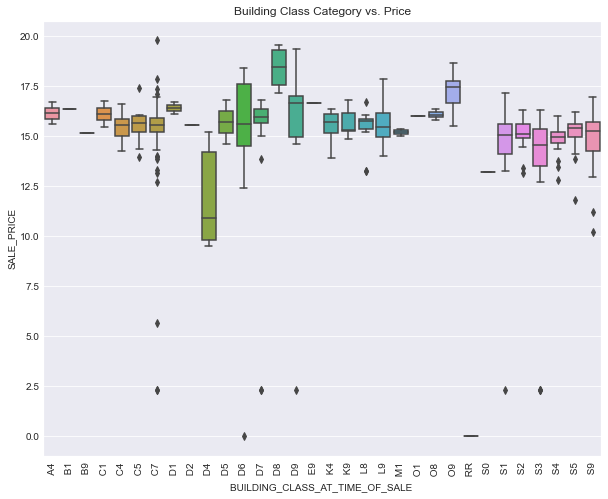

In [161]:
#plot of building class categories vs price
sns.set_style('darkgrid')
f, axes = plt.subplots(figsize = (10,8))

#create order variable to plot unique values only
order_tax = sorted(data['TAX_CLASS_AT_PRESENT'].unique())
order_class = sorted(data['BUILDING_CLASS_AT_TIME_OF_SALE'].unique())

sns.boxplot(x = 'BUILDING_CLASS_AT_TIME_OF_SALE', y = 'SALE_PRICE', data = data, ax = axes, order = order_class)
axes.set_xlabel('BUILDING_CLASS_AT_TIME_OF_SALE ')
axes.set_ylabel('SALE_PRICE')
axes.set_title('Building Class Category vs. Price')
plt.xticks(rotation=90)

plt.plot()

<AxesSubplot:xlabel='LAND_SQUARE_FEET', ylabel='SALE_PRICE'>

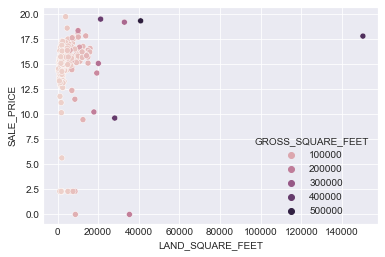

In [162]:
#Comparing Land area, square area and price
sns.scatterplot(data=data, x="LAND_SQUARE_FEET", y="SALE_PRICE", hue = "GROSS_SQUARE_FEET")


## Simple linear Model

In [163]:
# Dropping columns not to be used as predictors

data.drop(data[['ADDRESS', 'ZIP_CODE', 'LOT']], axis=1, inplace=True)

/tmp/ipykernel_100991/2892299942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[['ADDRESS', 'ZIP_CODE', 'LOT']], axis=1, inplace=True)


In [164]:
# preprocessing (scaleing and Categorical encoding) to prepare data for linear model
# Categorical columns are Encoded using Labbel Encoder
#Numerical colunms are scaled using Minmax Scaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
enc = LabelEncoder()

def preprocessor(data):
    cat = []
    catlist = ['NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY', 'TAX_CLASS_AT_PRESENT','BUILDING_CLASS_AT_PRESENT','TAX_CLASS_AT_TIME_OF_SALE','BUILDING_CLASS_AT_TIME_OF_SALE']
    for i in catlist:
        cat.append(enc.fit_transform(data[i]))
    
    num = data[['BLOCK', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'SALE_PRICE']]
    scaled_num = pd.DataFrame(scaler.fit_transform(num), columns = num.columns)
    
    cat_df = pd.DataFrame(np.array(cat).reshape(470, 6), columns = catlist)
    return pd.concat([scaled_num, cat_df], axis=1)

In [165]:
#Creating a processed dataframe through the above function
final_data = preprocessor(data)

In [166]:
#Inspecting columns
final_data.columns

Index(['BLOCK', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'LAND_SQUARE_FEET',
       'GROSS_SQUARE_FEET', 'SALE_PRICE', 'NEIGHBORHOOD',
       'BUILDING_CLASS_CATEGORY', 'TAX_CLASS_AT_PRESENT',
       'BUILDING_CLASS_AT_PRESENT', 'TAX_CLASS_AT_TIME_OF_SALE',
       'BUILDING_CLASS_AT_TIME_OF_SALE'],
      dtype='object')

In [167]:
# train and validation split using Sklearn's train test split
from sklearn.model_selection import train_test_split
X = final_data.drop(['SALE_PRICE'], axis=1)
y = final_data['SALE_PRICE']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [168]:
#linear regression training, prediction and score using Mean Square Error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)


0.016289751965954204


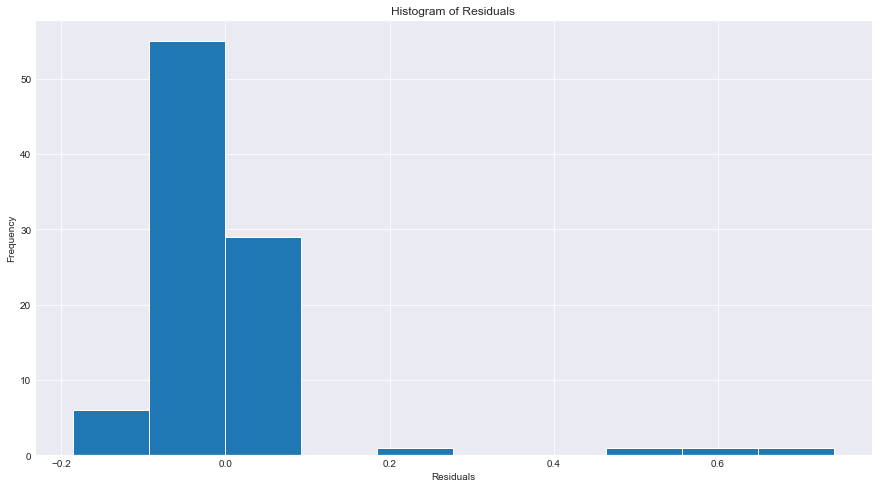

In [169]:
#Residual Plot showing predicted Values deviation from the actual values

res = y_pred-y_test
plt.rcParams['figure.figsize'] = [15, 8]
plt.hist(res, bins=10)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [170]:
#Cross Validation and scoring using kfold
from sklearn.model_selection import cross_val_score


scores = cross_val_score(model, X,y, cv=5)
scores.mean()

-0.1992877784834936

# Improved Model

Improving the model by imputing missingness to increasing data points

In [171]:
# New dataframe instance
df_2 = pd.read_csv('Manhattan12.csv', thousands=',')

In [172]:
#Column reformatting
df_2.columns = df_2.columns.str.replace('\n', ' ').str.replace(" ", "_").str.replace("-", "")


In [173]:
# Applying type conversion and processing by type functions defined earlier
df_2 = process_by_dtype(type_convertion(df_2))

In [174]:
# Missing Values inspection
df_2.isnull().sum()

NEIGHBORHOOD                          0
BUILDING_CLASS_CATEGORY               0
TAX_CLASS_AT_PRESENT                  0
EASEMENT                          27395
BUILDING_CLASS_AT_PRESENT             0
ADDRESS                               0
APART_MENT_NUMBER                     0
TAX_CLASS_AT_TIME_OF_SALE             0
BUILDING_CLASS_AT_TIME_OF_SALE        0
SALE_DATE                             0
BOROUGH                               0
BLOCK                                 0
LOT                                   0
ZIP_CODE                              1
RESIDENTIAL_UNITS                 16372
COMMERCIAL_UNITS                  23962
TOTAL_UNITS                        9704
LAND_SQUARE_FEET                  22906
GROSS_SQUARE_FEET                 23069
YEAR_BUILT                         6441
SALE_PRICE                         7593
dtype: int64

In [188]:
# dropping columns not to be used in new predictor
df_2.drop(['APART_MENT_NUMBER', 'BOROUGH', 'EASEMENT','ZIP_CODE'], axis=1, inplace=True)

KeyError: "['APART_MENT_NUMBER', 'BOROUGH', 'EASEMENT', 'ZIP_CODE'] not found in axis"

In [176]:
df_2 = df_2.replace('  ', np.NaN).replace(' ', '')

In [189]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

def preprocess_2(df):
    
    df_obj = df.select_dtypes(exclude=('int64', 'float64')) #Object Dtype is categorical
    df_num = df.select_dtypes(include=('int64', 'float64'))
    
    ##Scale numeric then fill values with KNNImputer
    scaler = MinMaxScaler()
    scaled_df_num = scaler.fit_transform(df_num)
     
    ## Impute scaled Values with KNNImputer which is a predictive imputer
    imp = KNNImputer()
    filled_df_2 = pd.DataFrame(imp.fit_transform(scaled_df_num), columns=df_num.columns) 
    
    date_field = df['SALE_DATE'].astype('category')
    
#For Categorical Data, first encode then scale

    for i in df_obj.columns:
        df_obj[i] = LabelEncoder().fit_transform(df_obj[i])
    
    obj_scaled = MinMaxScaler().fit_transform(df_obj)
    scaled_df_obj = pd.DataFrame(obj_scaled)
    
    new_cat_df = pd.DataFrame(imp.fit_transform(scaled_df_obj), columns=df_obj.columns)
    
    return pd.concat([new_cat_df, filled_df_2], axis=1)
    
    
    
    

In [178]:
new_data = preprocess_2(df_2)

# Applying new processing function to the data

## New Linear Model

In [179]:

#new data split
new_X = new_data.drop(new_data[['SALE_PRICE']], axis=1)
new_y = new_data['SALE_PRICE']

X_train2, X_test2, y_train2, y_test2 = train_test_split(new_X, new_y, test_size=0.2)

In [180]:

#Initializing new Linear regression, train it on the new data and make prediction
model2 = LinearRegression()

model2.fit(X_train2, y_train2)

y_pred2 = model2.predict(X_test2)


## New model's score.
mse_score = mean_squared_error(y_pred2, y_test2)

print(mse_score)

0.0003969742696292306


In [181]:
## cross validation 

scores2 = cross_val_score(model2, new_X, new_y, cv=10)
print(scores2)
print(scores2.mean())

[-0.03183263  0.09747576 -0.04788577  0.05502561  0.00271622 -0.01867494
  0.04717569 -0.38660802 -0.24816557 -0.29497558]
-0.08257492454186056


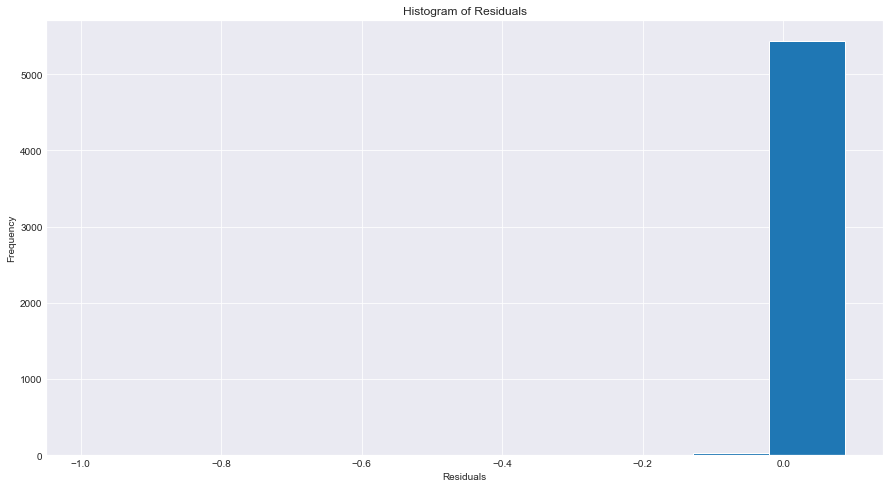

In [182]:
# new models Residual plot
res2 = y_pred2-y_test2
plt.rcParams['figure.figsize'] = [15, 8]
plt.hist(res2, bins=10)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

## Cluster Based Linear Regression

In [190]:
#cluster data into 10 clusters
from sklearn.cluster import KMeans
k=15
cluster = KMeans(n_clusters=k)
label = cluster.fit(new_data)

#cluster labels
labels_ = cluster.labels_
print(labels_)

#create a list of new clusters
new_data_clusters = [new_data[labels_ == i] for i in range(k)]



[ 7  7  7 ... 13 13 13]


In [191]:
# Create a list of dataframes divided from data according to clusters
df_list = []
for i in new_data_clusters:
    df_list.append(pd.DataFrame(i, columns = new_data.columns))

In [195]:
#fit regression models into each cluster
regressions = []
for i in range(k):
    regression = LinearRegression()
    regression.fit(df_list[i].iloc[:(len(df_list[i])// 3 * 2), :-1],df_list[i].iloc[:(len(df_list[i])// 3 * 2), -1])
    regressions.append(regression)

In [196]:
regressions

[LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression()]

In [197]:
# Predict and score each clusters
# Get score for each model.
for i in range(k):
    score = regressions[i].score(df_list[i].iloc[(len(df_list[i])// 3 * 2):, :-1], df_list[i].iloc[(len(df_list[i])// 3 * 2):, -1])
    print(f"R-squared for cluster {i+1}: {score}")

R-squared for cluster 1: -0.4669924954479321
R-squared for cluster 2: -0.11797466799907763
R-squared for cluster 3: -0.11844344197614154
R-squared for cluster 4: -6.009841786964703e+20
R-squared for cluster 5: 0.15254296208345897
R-squared for cluster 6: 0.024412515595192197
R-squared for cluster 7: 0.07882113965679127
R-squared for cluster 8: -0.8504451617717987
R-squared for cluster 9: -3.265424043243212e+23
R-squared for cluster 10: -2.9309827000176747e+22
R-squared for cluster 11: -0.5024143907990839
R-squared for cluster 12: -0.13070025521791595
R-squared for cluster 13: -0.9301842891282464
R-squared for cluster 14: -0.0016714614877222367
R-squared for cluster 15: -2.6954345866567264
